In [1]:
from bs4 import BeautifulSoup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
executable_path= {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [4]:
browser.visit(url)

In [5]:
html = browser.html

In [6]:
soup = BeautifulSoup(html, 'html.parser')

In [15]:

dfs = pd.read_html("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")

In [16]:
dfs 

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [23]:
df = dfs[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [24]:
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)

In [26]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [186]:
#  How many months exist on Mars?
months = df["month"].count()
months

1867

In [54]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
Martian_days = df["sol"].count()
Martian_days

1867

In [62]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

Month = df.groupby("month").mean()
Month

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [66]:
coldest = Month["min_temp"].min()
coldest

-83.30729166666667

In [68]:
Coldest_month = Month.loc[Month["min_temp"] == coldest]
Coldest_month

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.40625,75.010417,-83.307292,877.322917


In [69]:
Warmest = Month["min_temp"].max()
Warmest

-68.38297872340425

In [70]:
Warmest_month = Month.loc[Month["min_temp"] == Warmest]
Warmest_month

,id,sol,ls,min_temp,pressure
month,,,,,
8,718.078014,795.333333,224.347518,-68.382979,873.829787


In [71]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Temparature')

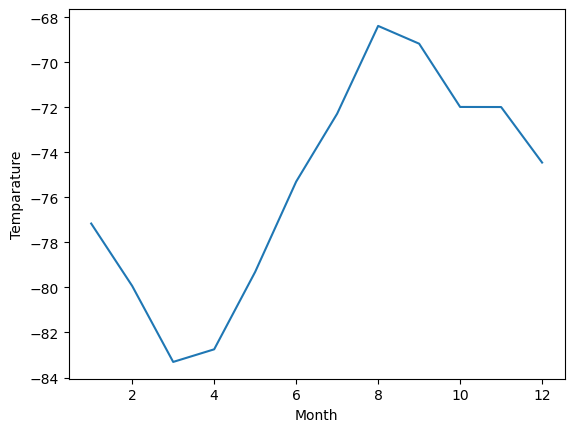

In [88]:

y_axis = Month.loc[:,"min_temp"]
plt.plot(y_axis)
plt.xlabel("Month")
plt.ylabel("Temparature")

In [82]:
#Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

low_pressure = Month["pressure"].min()
low_pressure


745.0544217687075

In [83]:
Low_pressure_month = Month.loc[Month["pressure"] == low_pressure]
Low_pressure_month

,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.29932,745.054422


In [84]:
high_pressure = Month["pressure"].max()
high_pressure

913.3059701492538

In [85]:
High_pressure_month = Month.loc[Month["pressure"] == high_pressure]
High_pressure_month

,id,sol,ls,min_temp,pressure
month,,,,,
9,785.843284,861.186567,254.052239,-69.171642,913.30597


Text(0, 0.5, 'Atmospheric Pressure')

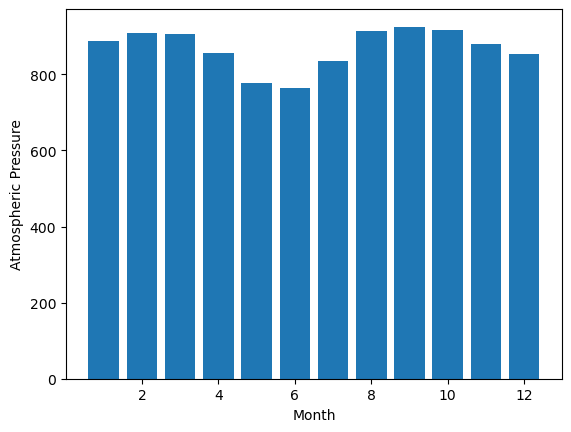

In [105]:
x_axis = df.loc[:,"month"]
y_axis = df.loc[:,"pressure"]
plt.bar(x_axis, y_axis)
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")

In [161]:
 #About how many terrestrial (Earth) days exist in a Martian year? 
 #That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
 #Visually estimate the result by plotting the daily minimum temperature.

Start = df.loc[df["month"] <= 8, ]
Start


,id,terrestrial_date,sol,ls,month,min_temp,pressure
90,7,2012-11-20,104,210,8,-67.0,838.0
91,8,2012-11-21,105,211,8,-66.0,839.0
92,9,2012-11-23,106,211,8,-66.0,841.0
93,10,2012-11-24,107,212,8,-66.0,844.0
94,11,2012-11-25,108,212,8,-65.0,845.0
...,...,...,...,...,...,...,...
1377,1402,2016-10-07,1483,237,8,-68.0,892.0
1378,1404,2016-10-08,1484,237,8,-68.0,895.0
1379,1405,2016-10-09,1485,238,8,-71.0,899.0
1380,1406,2016-10-10,1486,239,8,-71.0,901.0


In [201]:
days = df.loc[df["sol"] >= 1213 ]
Mars_days = days.loc[days["id"] <= 1798]

In [203]:
Mars_days["sol"].count()

652

In [207]:
Mars_days

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1118,1145,2016-01-04,1213,90,4,-84.0,851.0
1119,1144,2016-01-05,1214,90,4,-85.0,849.0
1120,1146,2016-01-06,1215,91,4,-85.0,848.0
1121,1147,2016-01-07,1216,91,4,-86.0,847.0
1122,1148,2016-01-08,1217,92,4,-88.0,846.0
...,...,...,...,...,...,...,...
1765,1794,2017-11-15,1876,87,3,-79.0,838.0
1766,1797,2017-11-16,1877,88,3,-79.0,837.0
1767,1795,2017-11-17,1878,88,3,-79.0,835.0
1768,1796,2017-11-18,1879,89,3,-79.0,834.0


Text(0.5, 0, 'ID')

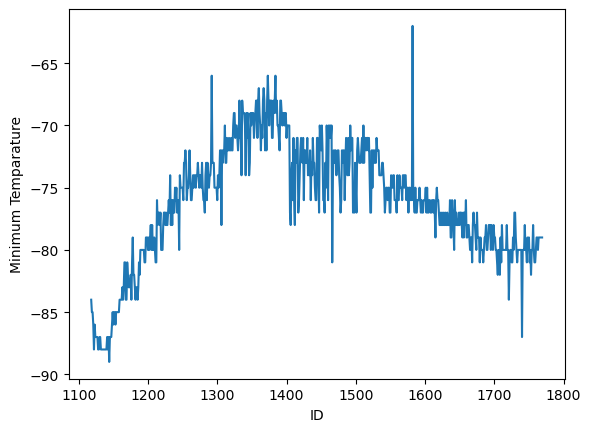

In [209]:
plt.plot(Mars_days["min_temp"])
plt.ylabel("Minimum Temparature")
plt.xlabel("ID")

In [211]:
browser.quit()

In [210]:
output_data = "Mars_data.csv"
df.to_csv(output_data)